In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

# Histogramm eines Grauwertbildes
Hier wird die Matplotlib-Funktion hist (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) und Numpy ravel (https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) verwendet.

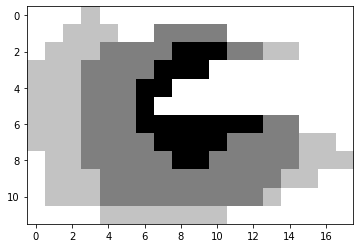

In [3]:
img = cv.imread('./img/raw_gray.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
# ToDo: Schreiben Sie hier eine Funktion histogram(img), die das Histogramm + normierte Histogramm des Grauwertbildes zurückgibt
def histogram(img):
    hist = []
    norm_hist = []
    return hist, norm_hist

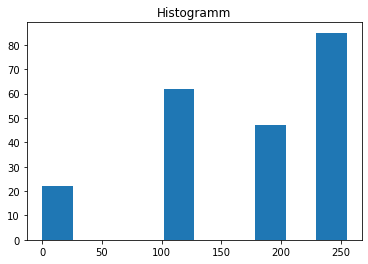

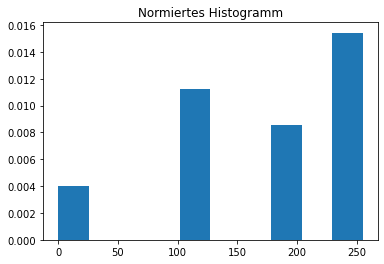

In [5]:
# Ausführung der geschriebenen Funktion
hist, norm_hist = histogram(img)

# Vergleich mit implementierter Histogramm Funktion
plt.hist(img.ravel(), density=False)
plt.title('Histogramm')
plt.show()

plt.hist(img.ravel(), density=True)
plt.title('Normiertes Histogramm')
plt.show()

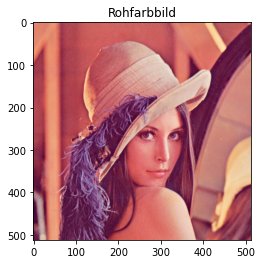

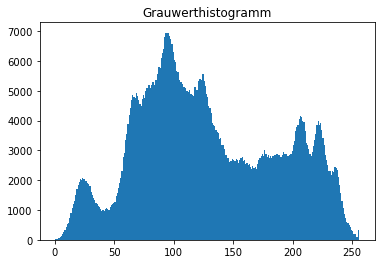

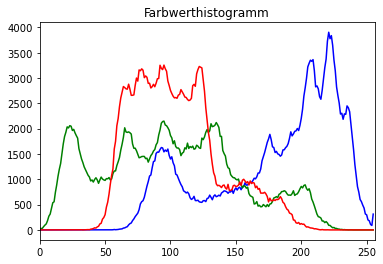

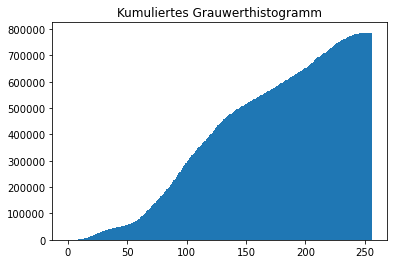

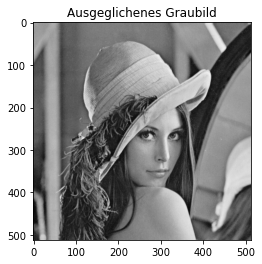

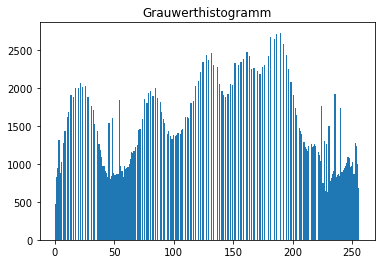

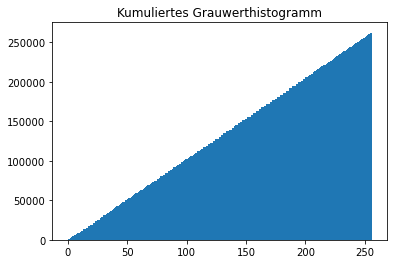

In [6]:
img_lena = cv.imread('./img/lena.jpg', -1)
img_lena = cv.cvtColor(img_lena, cv.COLOR_BGR2RGB)
plt.figure()
plt.title('Rohfarbbild')
plt.imshow(img_lena)

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lena.ravel(),256,[0,256])
plt.show()

# erstelle Farbwerthistogramm über R-, G- und B-Kanal
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv.calcHist([img_lena],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Farbwerthistogramm')
plt.show()

# erstelle kumuliertes (=aufsummiertes) Histogramm
plt.figure()
plt.title('Kumuliertes Grauwerthistogramm')
plt.hist(img_lena.ravel(),256,[0,256],cumulative=True)
plt.show()

# führe Histogrammausgleich durch
img_lena_gray = cv.cvtColor(img_lena, cv.COLOR_RGB2GRAY)
img_lena_eq = cv.equalizeHist(img_lena_gray)

plt.figure()
plt.title('Ausgeglichenes Graubild')
plt.imshow(img_lena_gray, cmap='gray')

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lena_eq.ravel(),256,[0,256])
plt.show()

plt.figure()
plt.title('Kumuliertes Grauwerthistogramm')
plt.hist(img_lena_eq.ravel(),256,[0,256],cumulative=True)
plt.show()

# Histogramm-Ausgleich

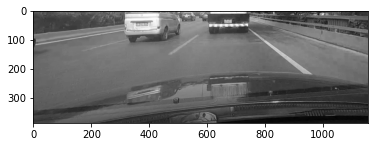

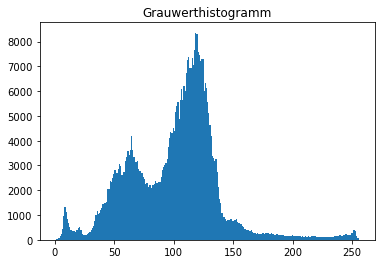

In [7]:
plt.figure()
img_lane = cv.imread('./img/uclanes_ex.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_lane, cmap='gray')

plt.figure()
plt.title('Grauwerthistogramm')
plt.hist(img_lane.ravel(),256,[0,256])
plt.show()

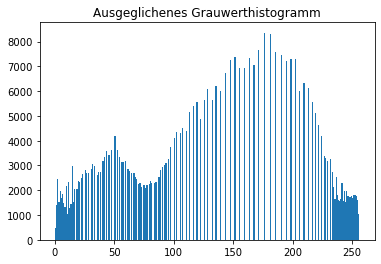

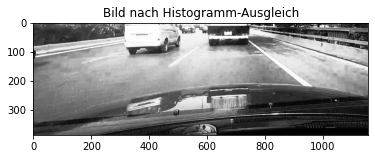

In [8]:
# führe Histogrammausgleich durch
img_lane_eq = cv.equalizeHist(img_lane)

plt.figure()
plt.title('Ausgeglichenes Grauwerthistogramm')
plt.hist(img_lane_eq.ravel(),256,[0,256]); plt.show()

plt.figure()
plt.title('Bild nach Histogramm-Ausgleich')
plt.imshow(img_lane_eq, cmap='gray')
plt.show()

# Punktoperatoren: Lineare Skalierung

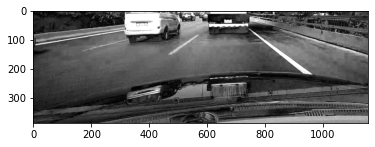

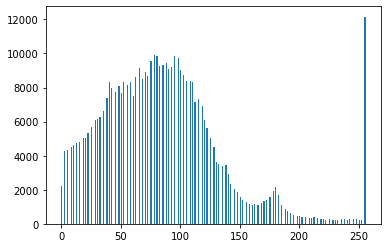

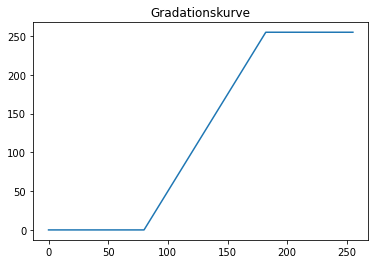

In [9]:
# Helligkeits- und Kontrastanpassung
# ToDo: Schreiben Sie eine Funktion scale_img(img), 
# die die Pixel des Eingangsbildes skaliert und mit einem Bias versieht:
# f*(x,y) = alpha * f(x,y) + beta
def scale_img(img, alpha, beta): 
    new_img = []
    return new_img

# Beispiel: 
# alpha < 1 --> reduziert Kontrast
# beta = 200 erhöht Helligkeit
alpha = 2.5
beta = -200
new_lane = []
new_lane = cv.convertScaleAbs(img_lane, alpha=alpha, beta=beta)
x = np.linspace(0,255,256)
y = alpha * x + beta
y = np.clip(y, 0, 255)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,[0,256])
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

# Punktoperatoren: Logarithmische Skalierung und Gamma-Korrektur

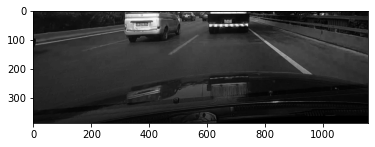

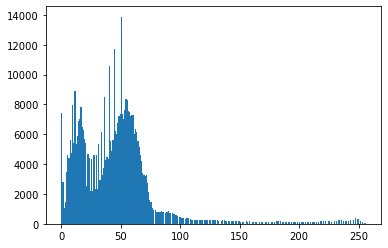

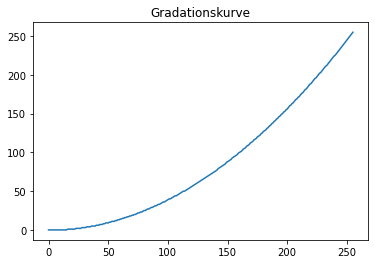

In [10]:
# Gamma-Korrektur

# Beispiel: 
gamma = 2

# Erstelle Look-Up-Table
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Wende Loop-up-table an
new_lane = cv.LUT(img_lane, lookUpTable)

# verteile 256 Werte von 0 bis 255 
x = np.linspace(0,255,256)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,[0,256])
plt.show()

plt.figure()
plt.plot(x,lookUpTable[0,:])
plt.title('Gradationskurve')
plt.show()

# Thresholding

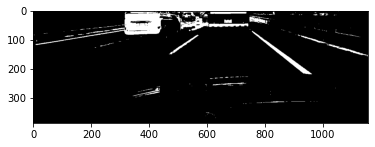

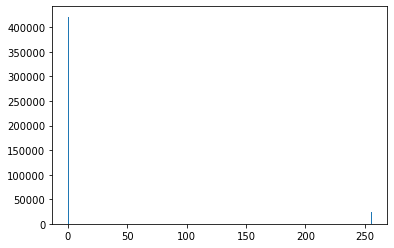

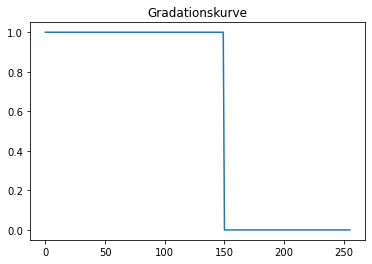

True

In [11]:
# Beispiel: 
thresh = 150

# wende Threshold an
ret, new_lane = cv.threshold(img_lane, thresh=thresh, maxval=255, type=cv.THRESH_BINARY)

x = np.linspace(0,255,256)
y = (x < thresh)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,[0,256])
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

cv.imwrite('./img/lanes_threshold.jpg', new_lane)

# Grauwert-Slicing
Beim Grauwert-Slicing wird versucht, das ursprüngliche Graubild durch wenige repräsentative Grauwerte abzubilden. Um repräsentative Grauwerte zu finden, wird das Histogramm betrachtet.

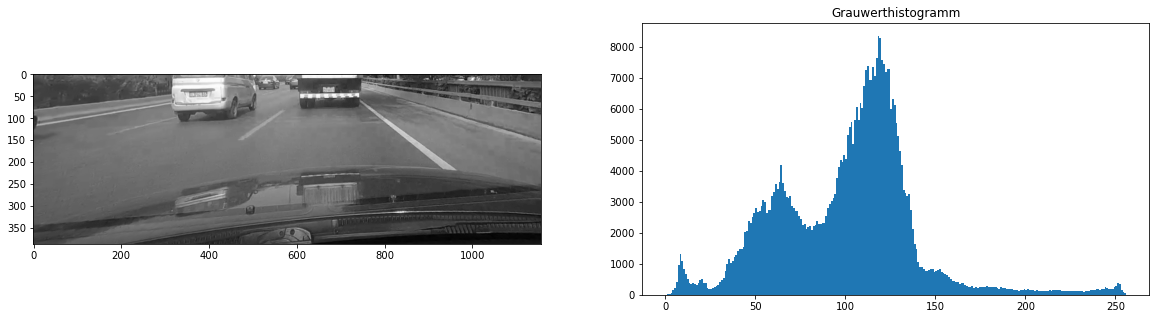

In [12]:
# zeige Originalbild und Histogramm
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.imshow(img_lane, cmap='gray')
plt.subplot(1,2,2)
plt.title('Grauwerthistogramm')
plt.hist(img_lane.ravel(),256,[0,256])
plt.show()

Es zeigen sich folgende Wertebereiche: 
- 0 - 24 --> 0
- 25 - 80 --> 85
- 80 - 170 --> 170
- 171 - 255 --> 255

Diese werden im Gray-Level-Slicing entsprechend zusammengefasst

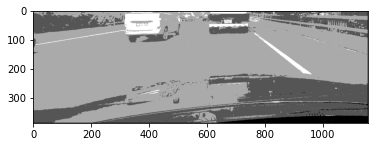

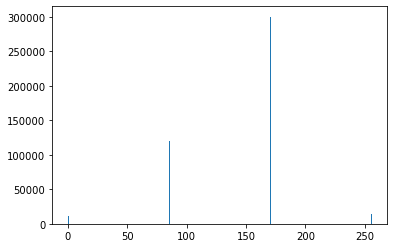

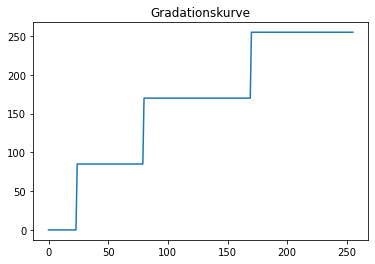

In [13]:
thresh1 = 24
thresh2 = 80 
thresh3 = 170

w = len(img_lane[0])
h = len(img_lane)

# erstelle leeres Bild
img_sliced = np.zeros((h,w), dtype = int)

# iteriere über die Pixel und weise sie den einzelnen Thresholds zu
for i in range(h-1):      
    for j in range(w-1):  
        if img_lane[i,j] <= thresh1: 
            img_sliced[i,j] = 0
        elif thresh1 < img_lane[i,j] <= thresh2: 
            img_sliced[i,j] = 85
        elif thresh2 < img_lane[i,j] <= thresh3: 
            img_sliced[i,j] = 170
        else:
            img_sliced[i,j] = 255            

# berechne Gradationskurve
x = np.linspace(0,255,256)
y = np.zeros(256)
y[0:thresh1] = 0
y[thresh1:thresh2] = 85
y[thresh2:thresh3] = 170
y[thresh3:] = 255
            
plt.figure()
plt.imshow(img_sliced, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(img_sliced.ravel(),256,[0,256])
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

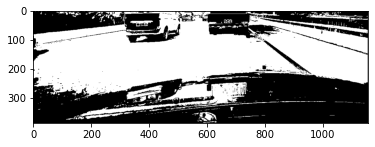

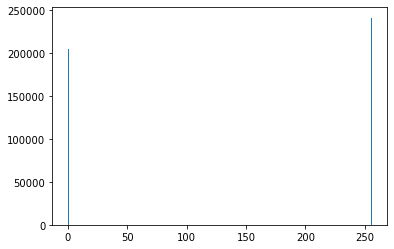

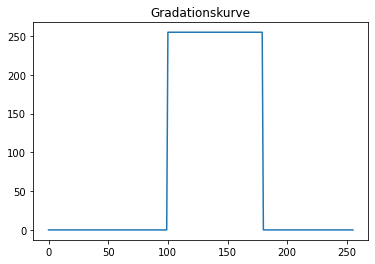

In [14]:
# Anpassung: Mapping der Signale auf 0 und 255

thresh1 = 100
thresh2 = 180 

w = len(img_lane[0])
h = len(img_lane)

# erstelle leeres Bild
img_sliced = np.zeros((h,w), dtype = int)
   
for i in range(h-1):      
    for j in range(w-1):          
        if thresh1 < img_lane[i,j] < thresh2: 
            img_sliced[i,j]= 255
        else:
            img_sliced[i,j] = 0

x = np.linspace(0,255,256)
y = np.zeros(256)
y[0:thresh1] = 0
y[thresh2:-1] = 0
y[thresh1:thresh2] = 255
            
plt.figure()
plt.imshow(img_sliced, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(img_sliced.ravel(),256,[0,256])
plt.show()

plt.figure()
plt.plot(x,y)
plt.title('Gradationskurve')
plt.show()

# Logarithmische Skalierung

45.98590442833571


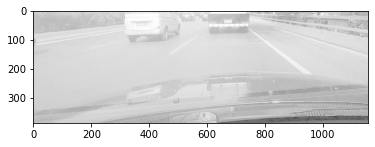

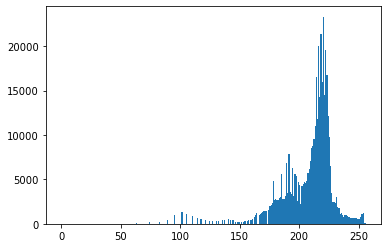

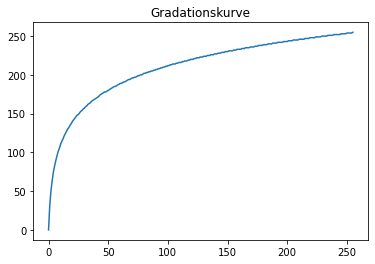

In [43]:
# Gamma-Korrektur

# Beispiel: 
c = 255 / (np.log(1 + np.max(img_lane)))

# erstelle Look-up-Table
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(c * np.log(1+i), 0, 255)

# wende Look-up-table an
new_lane = cv.LUT(img_lane, lookUpTable)

x = np.linspace(0,255,256)

plt.figure()
plt.imshow(new_lane, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure()
plt.hist(new_lane.ravel(),256,[0,256])
plt.show()

plt.figure()
plt.plot(x,lookUpTable[0,:])
plt.title('Gradationskurve')
plt.show()

# Negativ

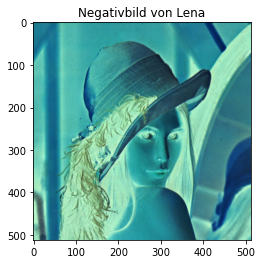

In [47]:
# erstelle das Negativ eines Bildes
img_lena_neg = cv.bitwise_not(img_lena)
plt.imshow(img_lena_neg)
plt.title('Negativbild von Lena')
plt.show()

# Aufgabe: Können Sie die versteckte Botschaft entschlüsseln?

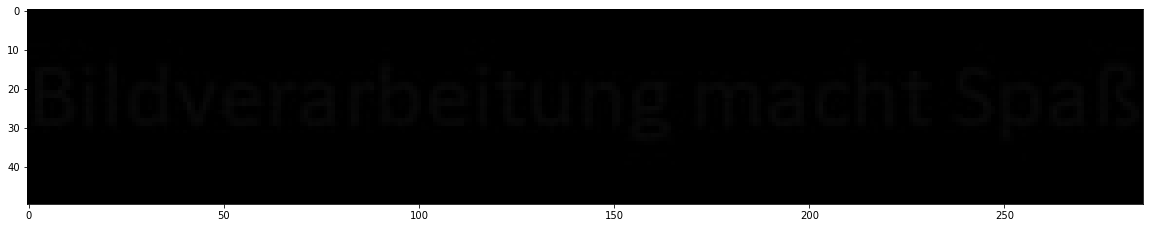

In [16]:
# lade Bild und stelle es dar
img = cv.imread('./img/versteckt.jpg', cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# ToDo: Finden Sie die versteckte Botschaft


## Aufgabe: Heben Sie auf folgenden Bildern die Linienmarkierungen hervor.

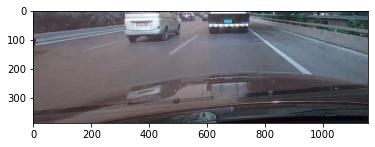

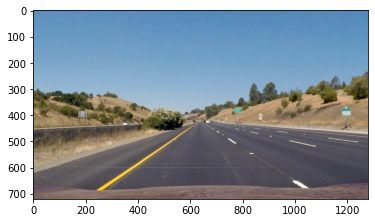

In [24]:
img_lane1 = cv.imread('./img/uclanes_ex.jpg', -1)
plt.figure()
plt.imshow(img_lane1)
plt.show()

img_lane2 = cv.imread('./img/image001.jpg', -1)
img_lane2 = cv.cvtColor(img_lane2, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img_lane2)
plt.show()

# ToDo: Hervorhebung der Linienmarkierungen mit Histogrammoperationen